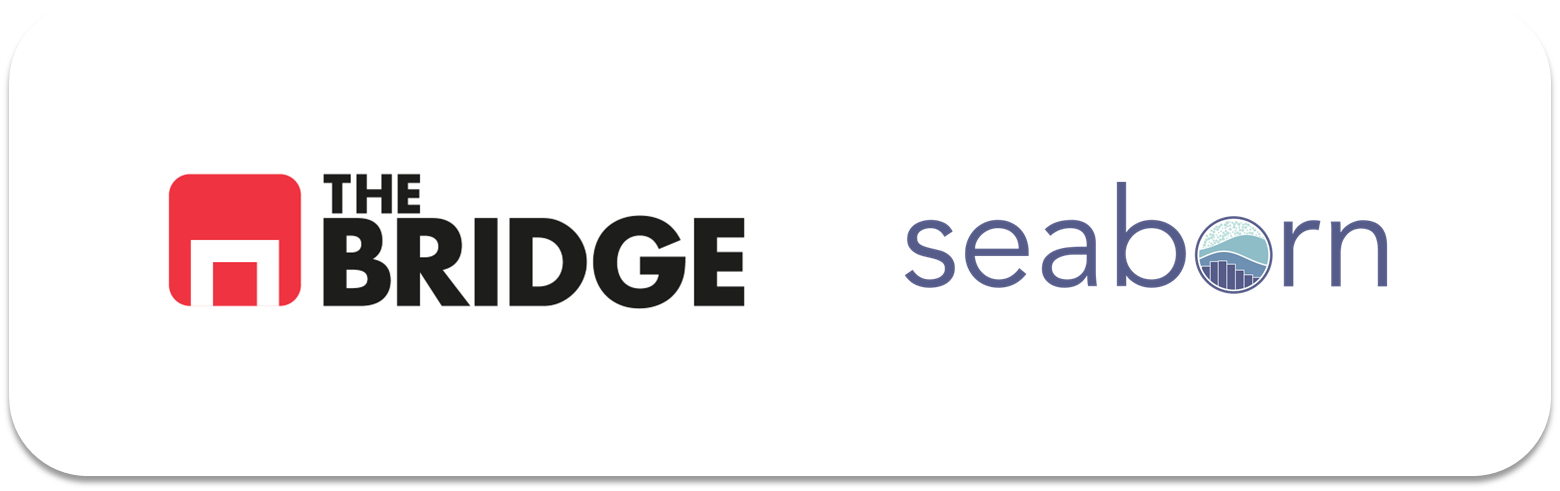

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import bootcampviztools as b

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [4]:
df_cities = pd.read_csv("./data/california_cities.csv")

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [5]:
def dispersion (df,
                num_col1, 
                num_col2, 
                num_col_dots_size, 
                cat_col = None, 
                scale = 1):
        
        plt.figure(figsize=(16.75,8))
        dots_size = df[num_col_dots_size]

        sns.scatterplot(x = num_col1,
                        y = num_col2, 
                        data=df,
                        hue = cat_col, 
                        size = dots_size, 
                        alpha = 0.7,
                        sizes = (5*scale,750*scale),
                        palette = "viridis",
                        legend = True)
        return
   

In [6]:
df_cities["log_poblacion"] = np.log10(df_cities["population_total"])
df_cities

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,log_poblacion
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03,4.501949
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37,4.308137
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79,4.877757
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28,4.278044
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01,4.919544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00,3.467312
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72,3.890141
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53,4.812412
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02,4.710684


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

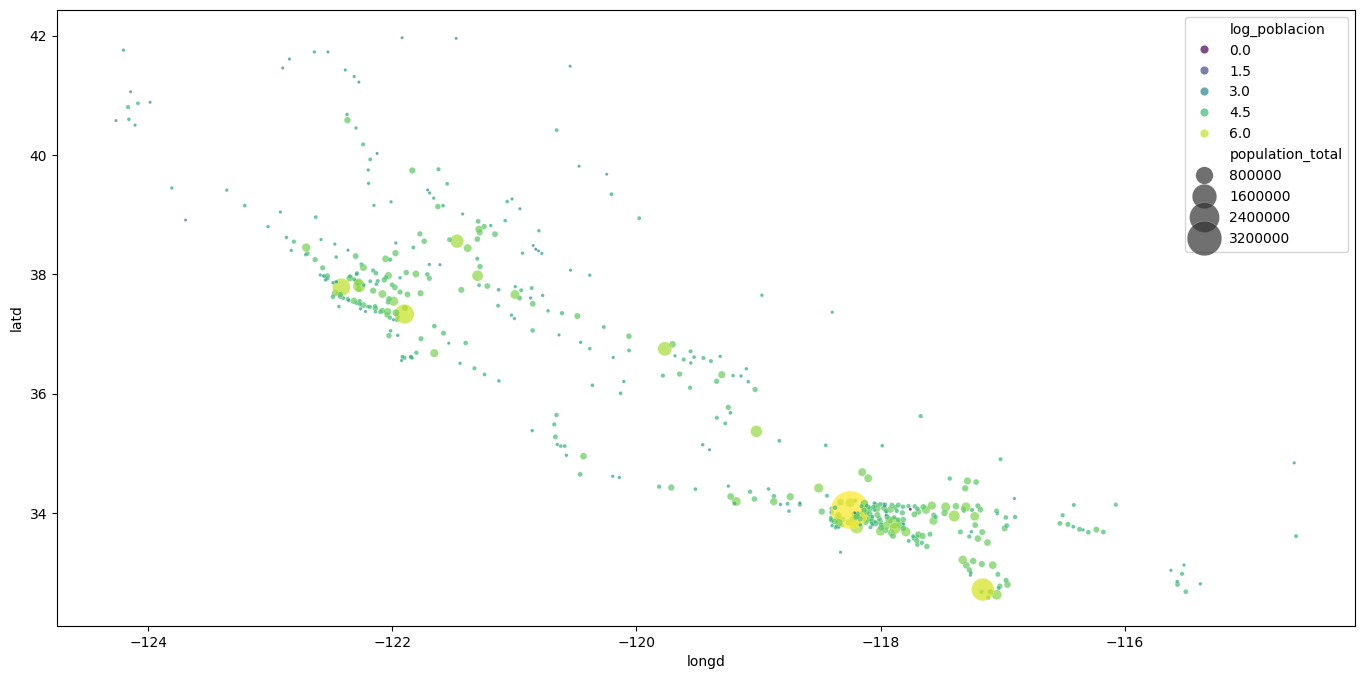

In [7]:
dispersion(df_cities, "longd", "latd", "population_total", "log_poblacion", scale=1)

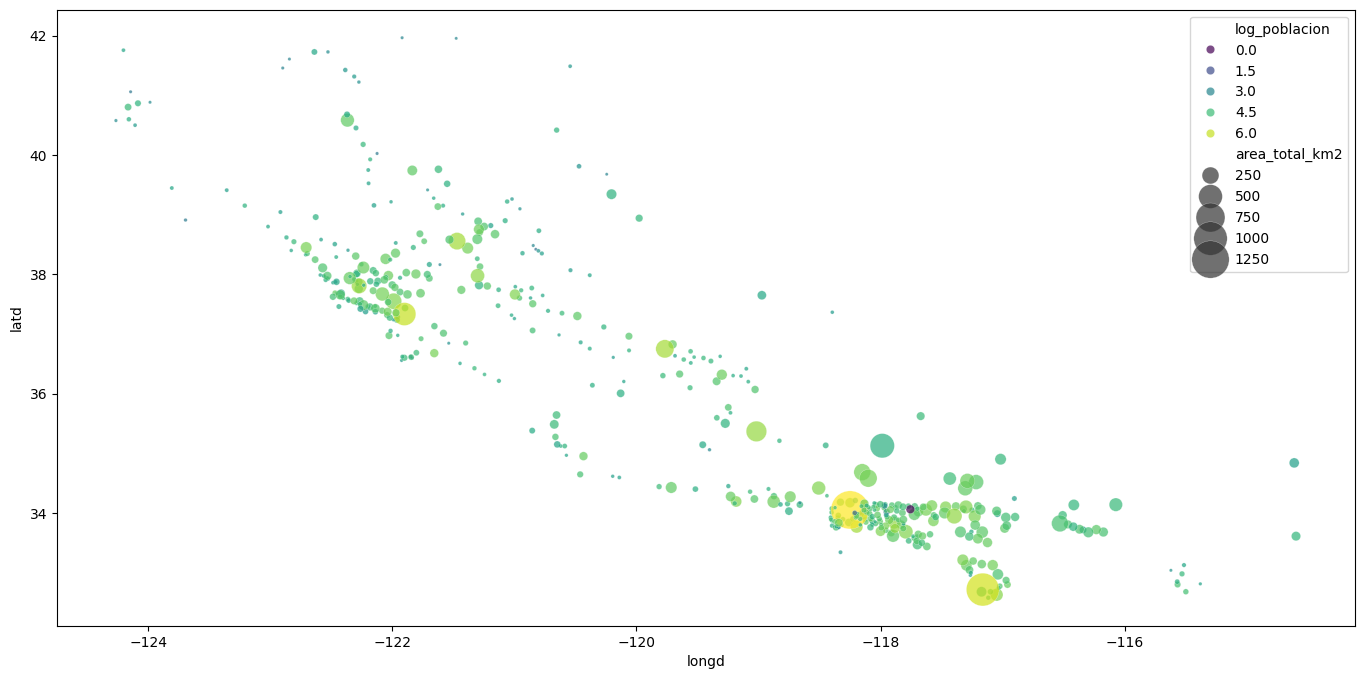

In [8]:
dispersion(df_cities, "longd", "latd", "area_total_km2", "log_poblacion", scale=1)


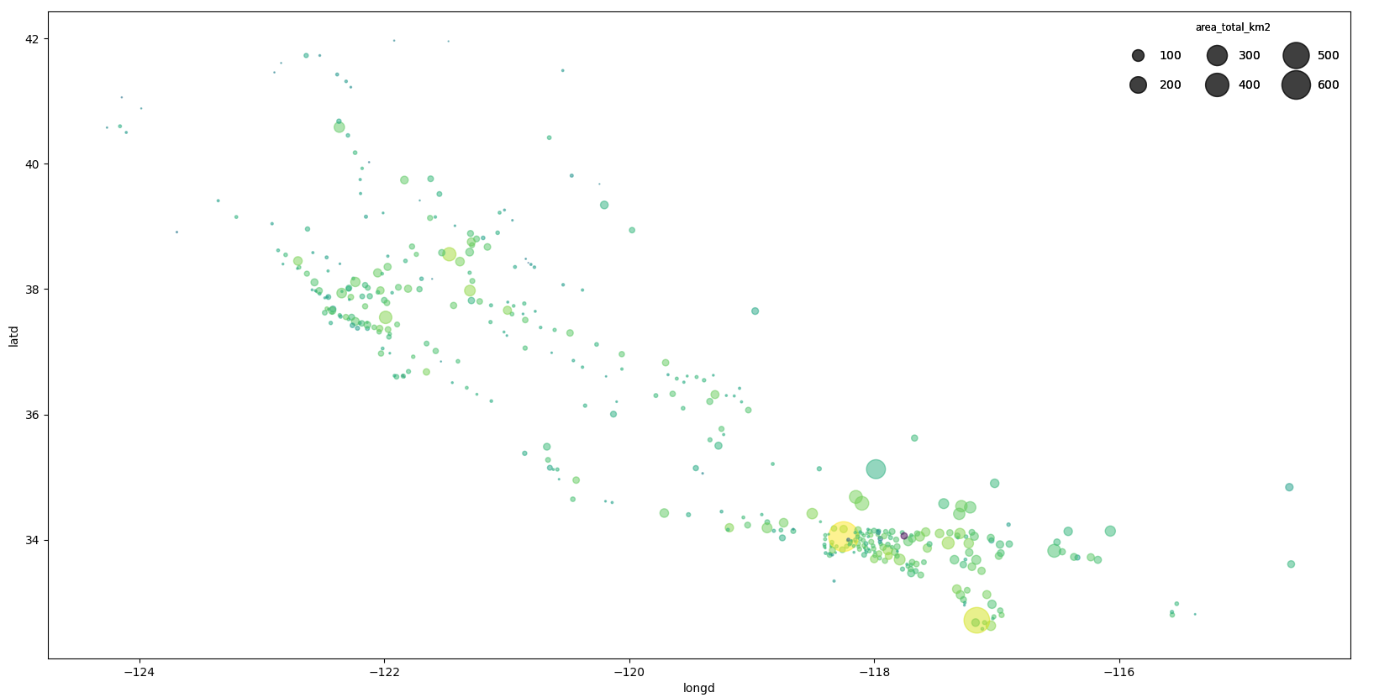

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [110]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Ratio supervivencia

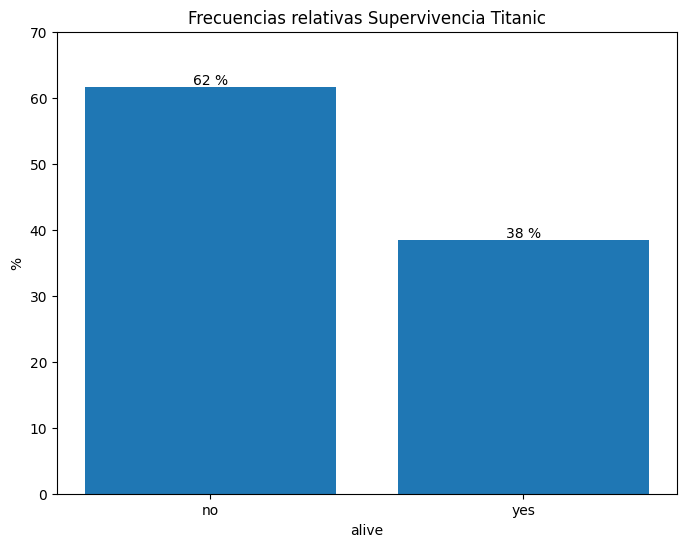

In [13]:
fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(8,6))


valores = df_titanic.alive.value_counts(normalize=True)*100
sns.barplot(x= valores.index, y =  valores.values, hue=valores.index, legend=False, ax = axs, palette="tab10")

axs.set_title("Frecuencias relativas Supervivencia Titanic")
axs.set_ylabel("%")
axs.set_ylim(0,70)

bar_container = axs.bar(valores.index, valores.values)

axs.bar_label(bar_container, fmt="{:,.0f} %", label_type="edge")
axs.margins(y=0.1)



In [14]:
path = "./graficos/supervivencia.png"
fig.savefig(path)

### Catplot --> Alive & Who - COUNT

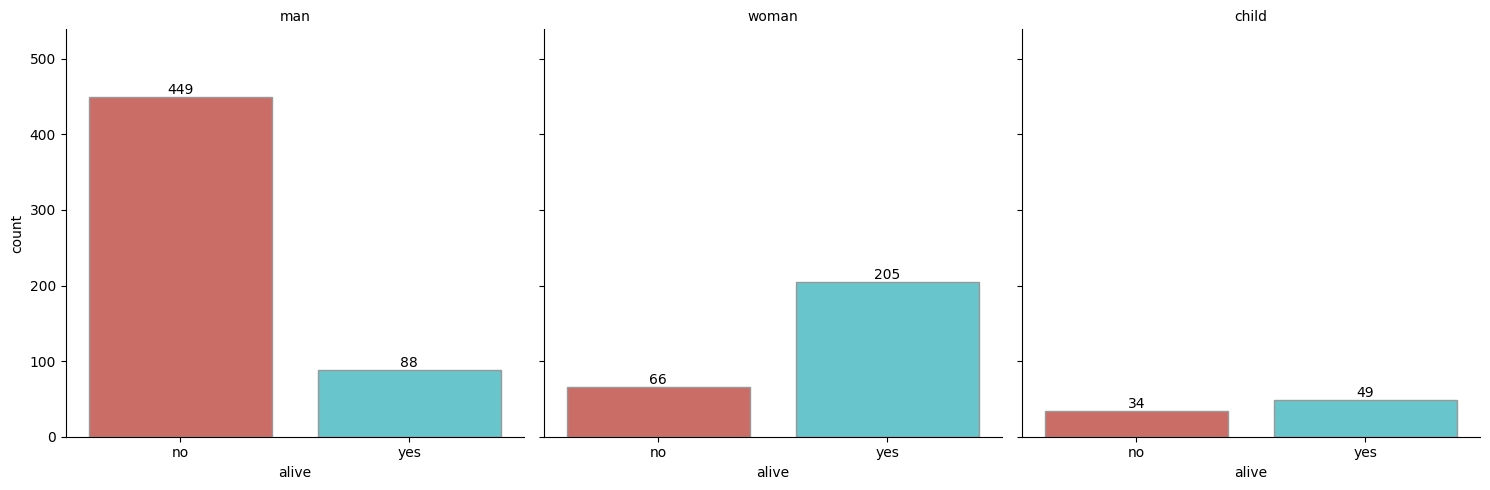

In [25]:
g = sns.catplot(x="alive",
            col = "who",
            kind="count",
            edgecolor=".6",
            orient = "V",
            hue = "alive",
            legend= False,
            data=df_titanic,
            palette= "hls",
            hue_order=["no","yes"],
            )
g.set_titles("{col_name}")
# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)



In [27]:
path = "./graficos/count_alive_who.png"
g.savefig(path)

### FUNCIÓN Catplot_relative (con valor numérico sobre las columnas del gráfico)

In [86]:
def catplot_relative(df, cat_colx, cat_coly, titulo = None, tipo_grafico = "bar", list_coly_order = None):
  
    frecuencias_relativas = df.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)
    frecuencias_relativas["proportion"]*=100


    a = sns.catplot(x=cat_colx,
            y = "proportion",
            col=cat_coly,
            col_order= list_coly_order,                
            hue = cat_colx,
            hue_order=["no","yes"],
            kind= tipo_grafico,
            edgecolor=".6",
            palette= "hls",
            data= frecuencias_relativas,
            sharex="row")
    
    for ax in a.axes.ravel():
    
    # add annotations
        for c in ax.containers:
            # add custom labels with the labels=labels parameter if needed
            # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
            ax.bar_label(c, fmt='{:,.0f} %', label_type='edge')
            ax.margins(y=0.2)

    a.set_axis_labels(cat_colx,"%")
    a.set_titles("{col_name}")

    a.fig.subplots_adjust(top=0.8)
    a.fig.suptitle(titulo)

    path = f"./graficos/{titulo}.png"
    a.savefig(path)

    return

### Catplot_relative --> Alive & Who

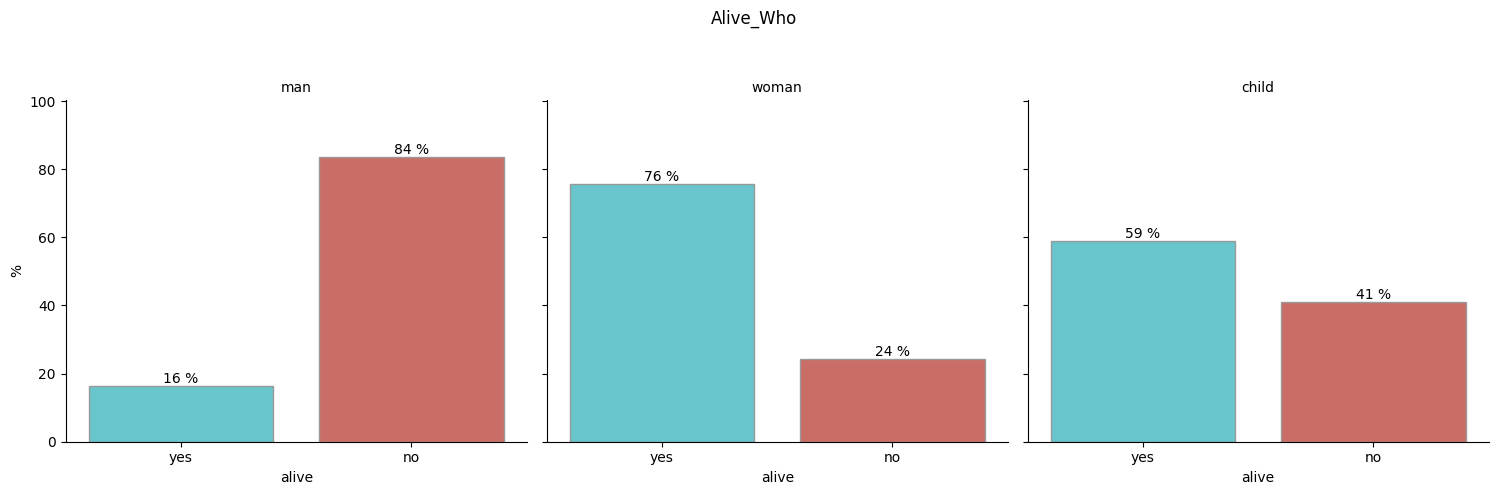

In [88]:
catplot_relative(df_titanic,"alive","who", list_coly_order=["man","woman","child"], titulo="Alive_Who")

### Catplot_relative --> Alive & Sex

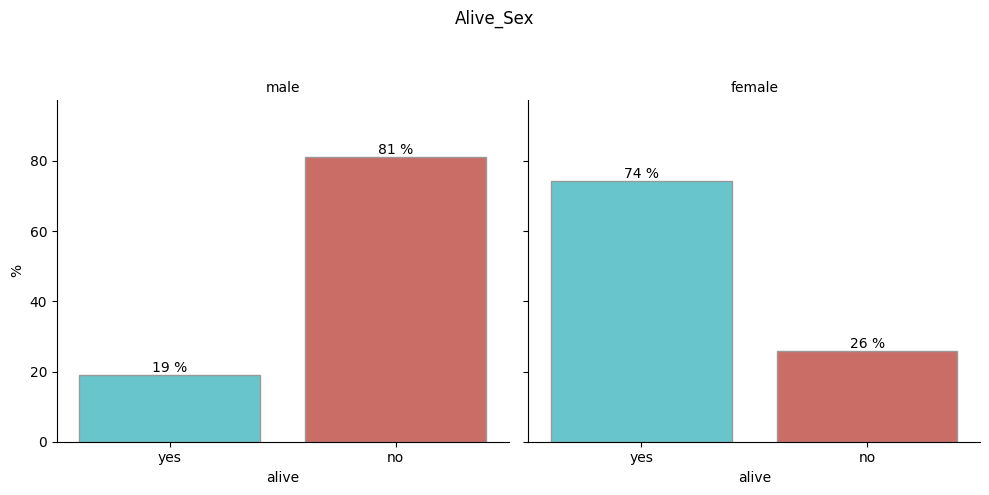

In [18]:
catplot_relative(df_titanic,"alive","sex", list_coly_order=["male","female"],titulo="Alive_Sex")

### Catplot_relative --> Alive & Class

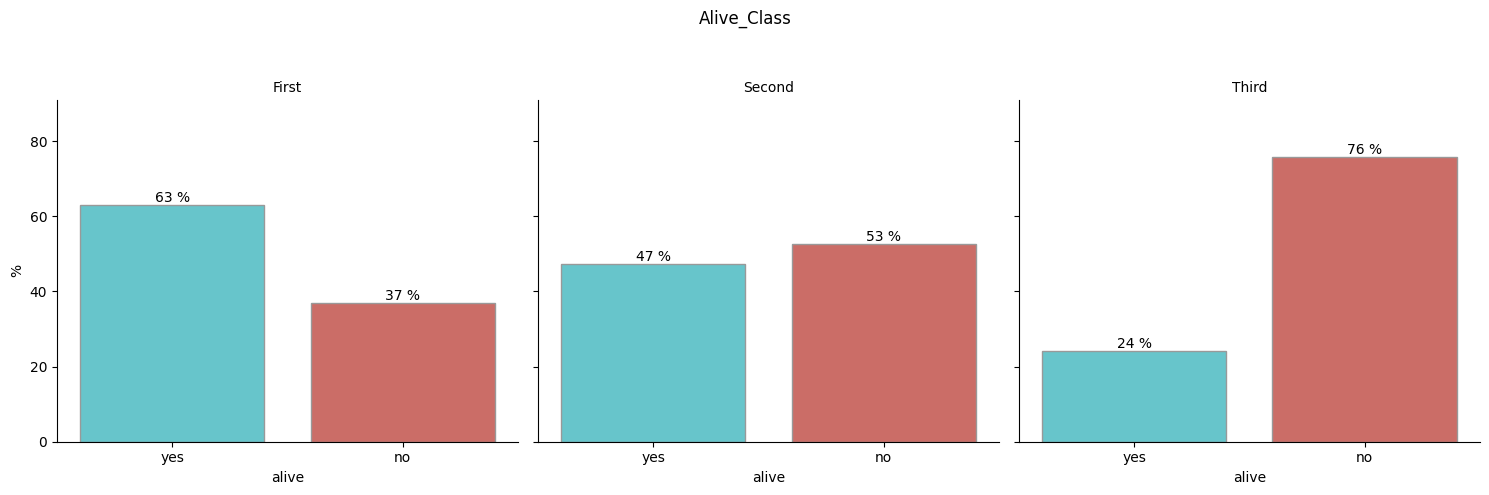

In [92]:
catplot_relative(df_titanic,"alive","class", list_coly_order=["First","Second","Third"],titulo="Alive_Class")

### Catplot_relative --> Alive & Embark Town

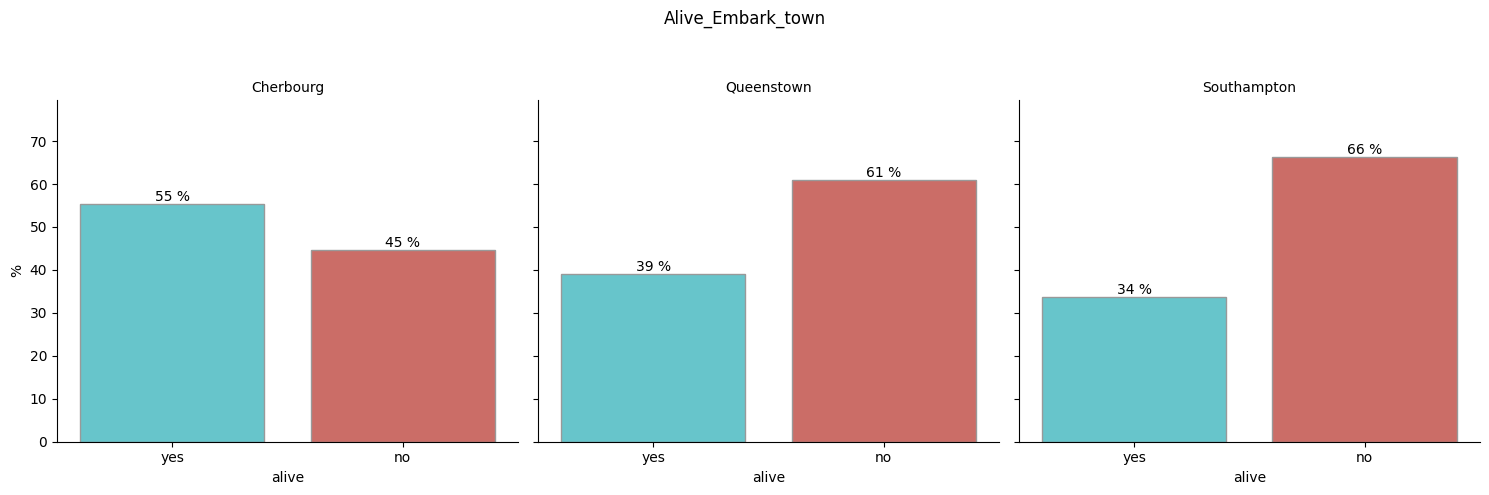

In [44]:
catplot_relative(df_titanic,"alive","embark_town",titulo="Alive_Embark_town")

### Who & Class

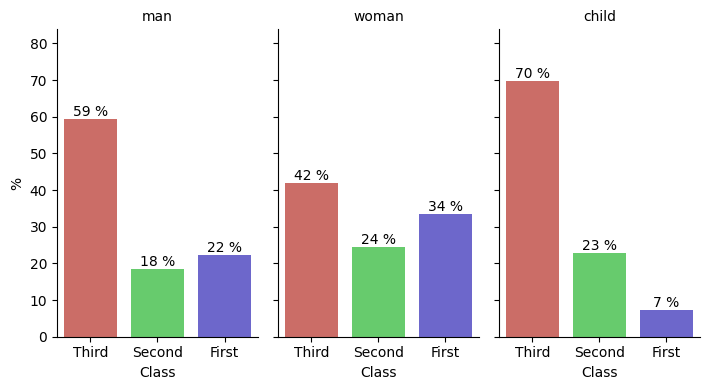

In [95]:
cat_colx = "class"
cat_coly = "who"
frecuencias_absolutas_1 = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas_1 = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas_1["proportion"]*=100

h= sns.catplot(data=frecuencias_relativas_1, 
                x="class",
                y = "proportion",
                col="who",
                kind="bar", height=4, aspect=.6, hue="class", col_order=["man","woman","child"], row_order=["First", "Second","Third"],
                palette= "hls"
)

for ax in h.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt='{:,.0f} %', label_type='edge')
    ax.margins(y=0.2)

h.set_axis_labels("Class","%")
h.set_titles("{col_name}")

In [96]:
path = "./graficos/Alive_who_class.png"
h.savefig(path)

### Numero de pasajeros segun puerto de embarque

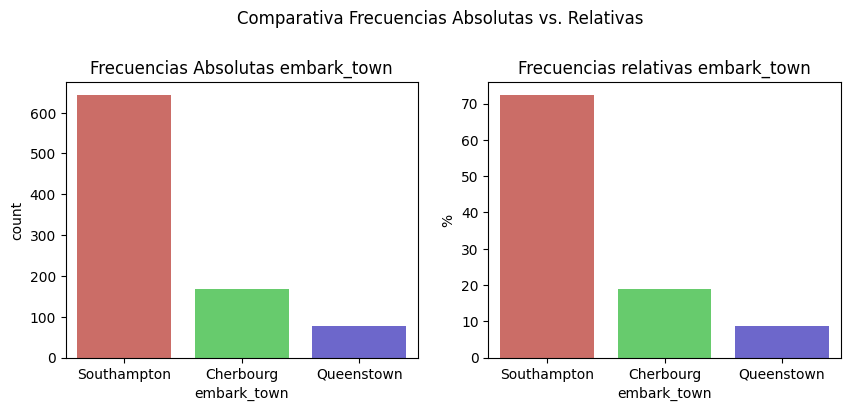

In [61]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Comparativa Frecuencias Absolutas vs. Relativas")
fig.subplots_adjust(top=0.8)

sns.countplot(x = "embark_town", data = df_titanic, ax = axs[0], hue = "embark_town", legend = False,palette= "hls")
axs[0].set_title("Frecuencias Absolutas embark_town")

valores = df_titanic.embark_town.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1],palette= "hls")
axs[1].set_title("Frecuencias relativas embark_town")
axs[1].set_ylabel("%");

In [59]:
path = "./graficos/Frecuencias_abs_rel_puerto_embarque.png"
fig.savefig(path)

### Supervivencias segun clase y puerto de embarque

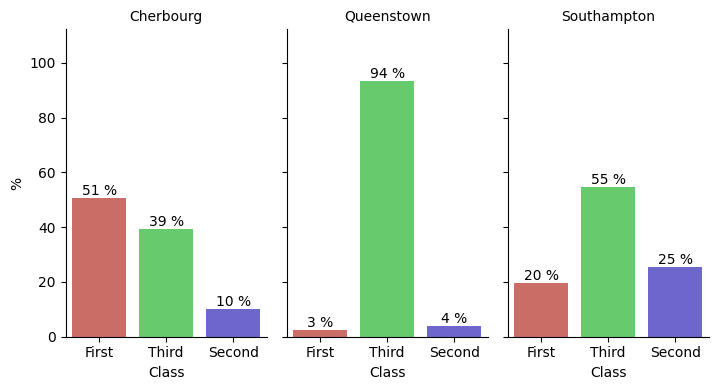

In [115]:
cat_colx = "class"
cat_coly = "embark_town"
frecuencias_absolutas_1 = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts()
frecuencias_relativas_1 = df_titanic.groupby(cat_coly, as_index = False)[cat_colx].value_counts(normalize = True)

frecuencias_relativas_1["proportion"]*=100

u= sns.catplot(data=frecuencias_relativas_1, 
                x="class",
                y = "proportion",
                col="embark_town",
                kind="bar", height=4, aspect=.6, hue="class",
                palette= "hls"
)

for ax in u.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt='{:,.0f} %', label_type='edge')
    ax.margins(y=0.2)

u.set_axis_labels("Class","%")
u.set_titles("{col_name}");

In [55]:
path = "./graficos/Alive_embark_town_class.png"
u.savefig(path)

### Numero de pasajeros segun puerto

C:\Users\Luis\AppData\Local\Temp\ipykernel_15692\1423983212.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  t= sns.catplot(x="embark_town",


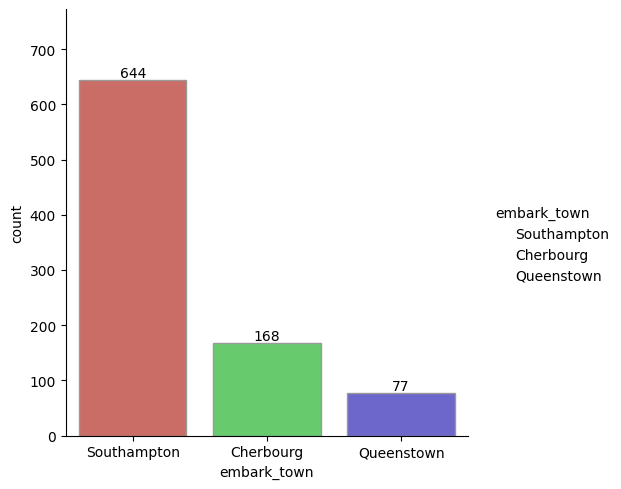

In [76]:
t= sns.catplot(x="embark_town",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=df_titanic.sort_values("class"),palette= "hls");

for ax in t.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt='{:,.0f}', label_type='edge')
    ax.margins(y=0.2)

In [77]:
path = "./graficos/embark_town_absoluto.png"
t.savefig(path)

### Numero de pasajeros segun clase

C:\Users\Luis\AppData\Local\Temp\ipykernel_15692\2050445962.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  d= sns.catplot(x="class",


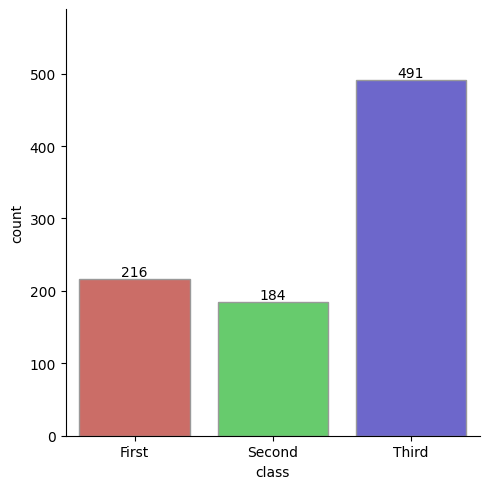

In [68]:
d= sns.catplot(x="class",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=df_titanic.sort_values("class"),palette= "hls");

for ax in d.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt='{:,.0f}', label_type='edge')
    ax.margins(y=0.2)

In [72]:
path = "./graficos/class_absoluto.png"
d.savefig(path)

### Numero de pasajeros segun genero y ser menor de edad

C:\Users\Luis\AppData\Local\Temp\ipykernel_15692\1887539463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x= sns.catplot(x="who",


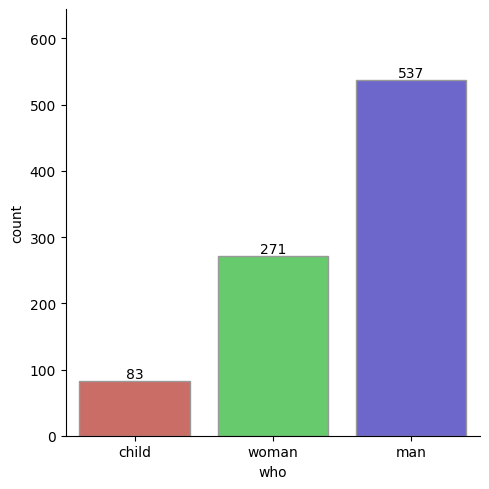

In [78]:
x= sns.catplot(x="who",
            kind="count",
            edgecolor=".6",
            orient="V",
            data=df_titanic.sort_values("class"),palette= "hls");

for ax in x.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt='{:,.0f}', label_type='edge')
    ax.margins(y=0.2)

In [79]:
path = "./graficos/who_absoluto.png"
x.savefig(path)

### Tasa supervivencia entre mujeres y niños

In [46]:
filtro_sin_hombres = df_titanic.who != "man"

df_w_c = df_titanic[filtro_sin_hombres]

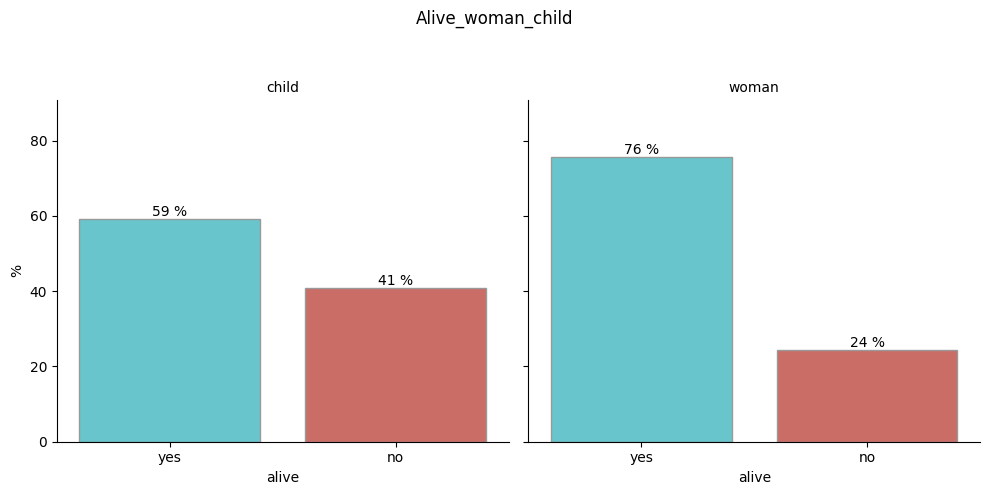

In [47]:
catplot_relative(df_w_c,"alive","who",titulo="Alive_woman_child")